# Number of Factors

A notebook for evaluating the number of factors for our various timeframes and universe sizes. Takes aggregate-level return and correlation matrices designed in preprocessing_eval_aggregate.ipynb.

### Universe: 25 Stocks

| Method | 2000-2004 | 2005-2009 | 2010-2014 | 2015-2019 |
|--------|-----------|-----------|-----------|-----------|
| 🏔️ Scree | 3 | 2 | 2 | 2 |
| 📊 Log Scree | 4 | 3 | 4 | 3 |
| 👑 Kaiser | 5 | 3 | 3 | 4 |
| 🔍 IC | 1 | 1 | 1 | 2 |
| 🧮 AET | 3 | 2 | 2 | 2 |
| **Mean** | **3.2** | **2.2** | **2.4** | **2.6** |
| **Mode** | **3** | **2** | **2** | **2** |
| 🎯 Chosen | 4 | 3 | 3 | 3 |

### Universe: 50 Stocks

| Method | 2000-2004 | 2005-2009 | 2010-2014 | 2015-2019 |
|--------|-----------|-----------|-----------|-----------|
| 🏔️ Scree | 4 | 3 | 2 | 3 |
| 📊 Log Scree | 5 | 6 | 7 | 6 |
| 👑 Kaiser | 9 | 5 | 5 | 9 |
| 🔍 IC | 1 | 2 | 2 | 2 |
| 🧮 AET | 5 | 4 | 3 | 5 |
| **Mean** | **4.8** | **4** | **3.8** | **5** |
| **Mode** | **5** | **3** | **2** | **3** |
| 🎯 Chosen | 5 | 4 | 4 | 5 |

### Universe: 75 Stocks

| Method | 2000-2004 | 2005-2009 | 2010-2014 | 2015-2019 |
|--------|-----------|-----------|-----------|-----------|
| 🏔️ Scree | 3 | 2 | 2 | 3 |
| 📊 Log Scree | 7 | 8 | 9 | 10 |
| 👑 Kaiser | 14 | 8 | 8 | 13 |
| 🔍 IC | 2 | 3 | 2 | 3 |
| 🧮 AET | 7 | 5 | 5 | 8 |
| **Mean** | **6.6** | **5.2** | **5.2** | **7.4** |
| **Mode** | **7** | **5** | **2** | **3** |
| 🎯 Chosen | 7 | 6 | 6 | 8 |

### Universe: 100 Stocks

| Method | 2000-2004 | 2005-2009 | 2010-2014 | 2015-2019 |
|--------|-----------|-----------|-----------|-----------|
| 🏔️ Scree | 3 | 4 | 2 | 3 |
| 📊 Log Scree | 12 | 12 | 10 | 14 |
| 👑 Kaiser | 19 | 11 | 9 | 16 |
| 🔍 IC | 2 | 4 | 3 | 3 |
| 🧮 AET | 10 | 7 | 6 | 10 |
| **Mean** | **9.2** | **7.6** | **6** | **9.2** |
| **Mode** | **2** | **4** | **2** | **3** |
| 🎯 Chosen | 10 | 8 | 7 | 10 |

### Universe: 250 Stocks

| Method          | Period 1 | Period 2 | Period 3 | Period 4 |
|-----------------|----------|----------|----------|----------|
| 🏔️ Scree       | 7        | 6        | 5        | 10       |
| 📊 Log Scree    | 25       | 25       | 25       | 25       |
| 👑 Kaiser       | 22       | 13       | 13       | 18       |
| 🔍 IC           | 7        | 7        | 6        | 9        |
| 🧮 AET          | 50       | 31       | 29       | 38       |
| **Mean**        | 22.2     | 16.4     | 15.6     | 20       |
| **Mode**        | 7        | 7        | 6        | 9        |
| 🎯 Chosen       | 23       | 17       | 16       | 20       |


In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import os

from functions import ic_factors, scree, log_scree, kaiser, aet

In [2]:
base_path = "Final_Data/Walkforward_Sets/aggregate_level/"

# For the regular dataframes
for year in ['00', '05', '10', '15']:
    for size in ['25', '50', '75', '100', '250']:
        # Import residuals
        df_name = f"df{year}_{size}"
        file_name = f"df{year}_varresid_is_{size}.csv"
        globals()[df_name] = pd.read_csv(os.path.join(base_path, file_name), index_col=0)
        
        # Import correlation matrices
        corr_name = f"corr{year}_{size}"
        corr_file = f"df{year}_varresid_is_{size}_corr_{size}.csv"
        globals()[corr_name] = pd.read_csv(os.path.join(base_path, corr_file), index_col=0)


In [3]:
corrs_25 = [corr00_25, corr05_25, corr10_25, corr15_25]
corrs_50 = [corr00_50, corr05_50, corr10_50, corr15_50]
corrs_75 = [corr00_75, corr05_75, corr10_75, corr15_75]
corrs_100 = [corr00_100, corr05_100, corr10_100, corr15_100]
corrs_250 = [corr00_250, corr05_250, corr10_250, corr15_250]

dfs_25 = [df00_25, df05_25, df10_25, df15_25]
dfs_50 = [df00_50, df05_50, df10_50, df15_50]
dfs_75 = [df00_75, df05_75, df10_75, df15_75]
dfs_100 = [df00_100, df05_100, df10_100, df15_100]
dfs_250 = [df00_250, df05_250, df10_250, df15_250]

## 25 Stocks

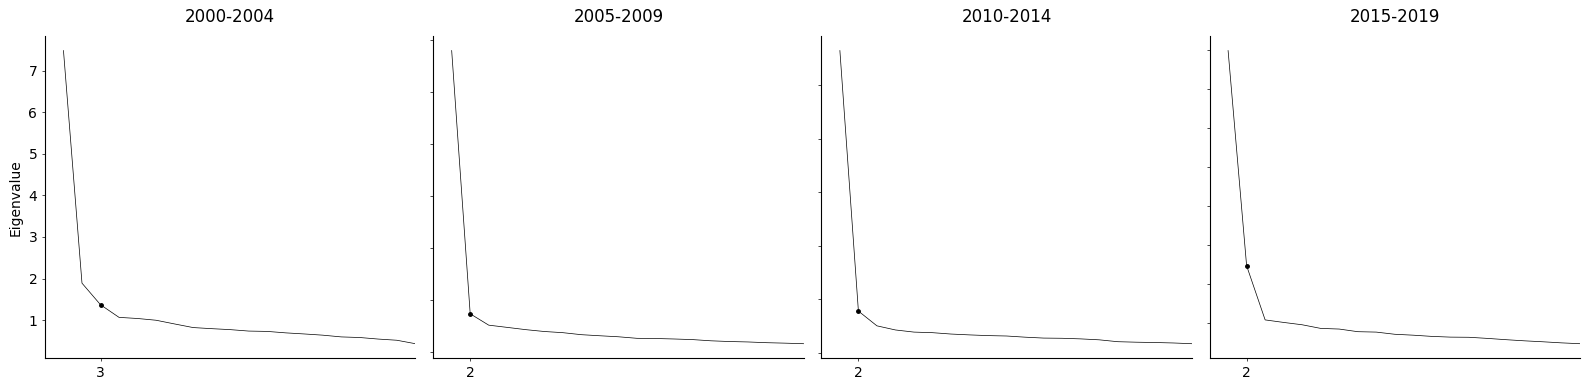

In [4]:
scree(corrs_25, cutoffs=[3, 2, 2, 2], xlim=20)

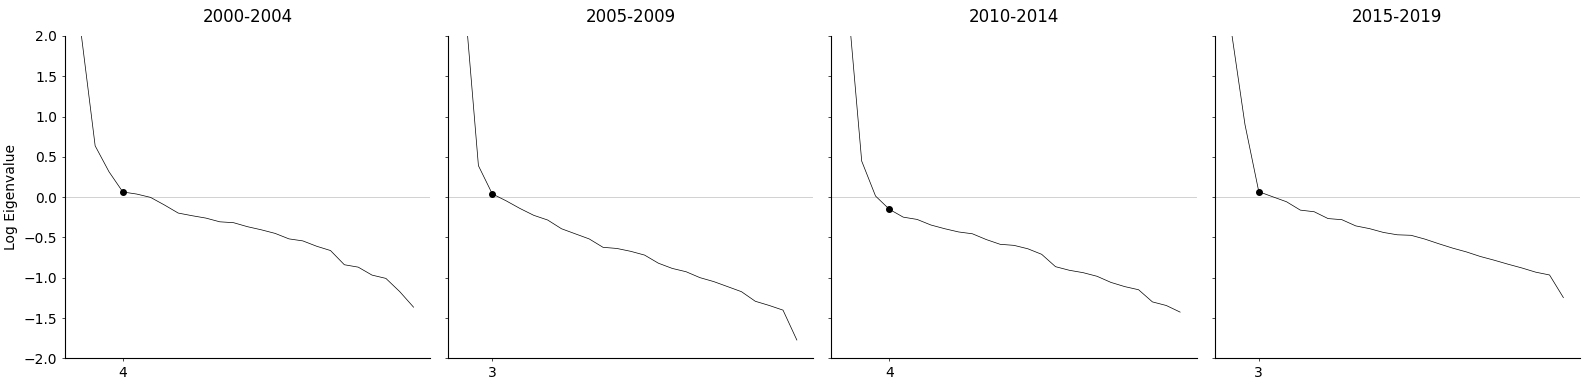

In [5]:
log_scree(corrs_25, cutoffs=[4, 3, 4, 3])

In [6]:
for corr, df in zip(corrs_25, dfs_25): 
    print(aet(corr, df)[0])

3
2
2
2


In [7]:
for corr, df in zip(corrs_25, dfs_25): 
    print(ic_factors(corr, df))

1
1
1
2


In [8]:
for corr in corrs_25: 
    print(kaiser(corr))

5
3
3
4


## 50 Stocks

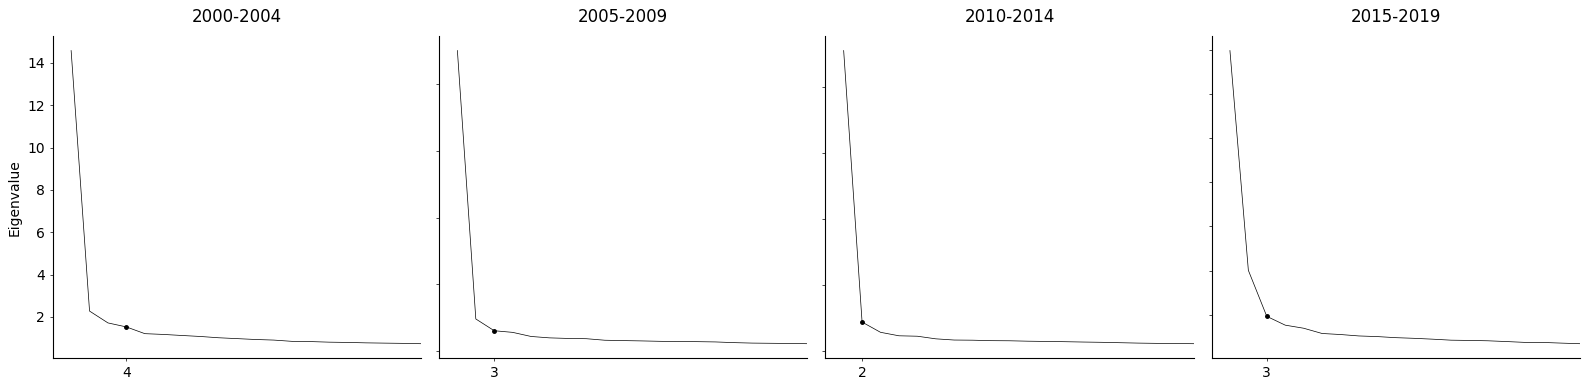

In [9]:
scree(corrs_50, cutoffs=[4, 3, 2, 3], xlim=20)

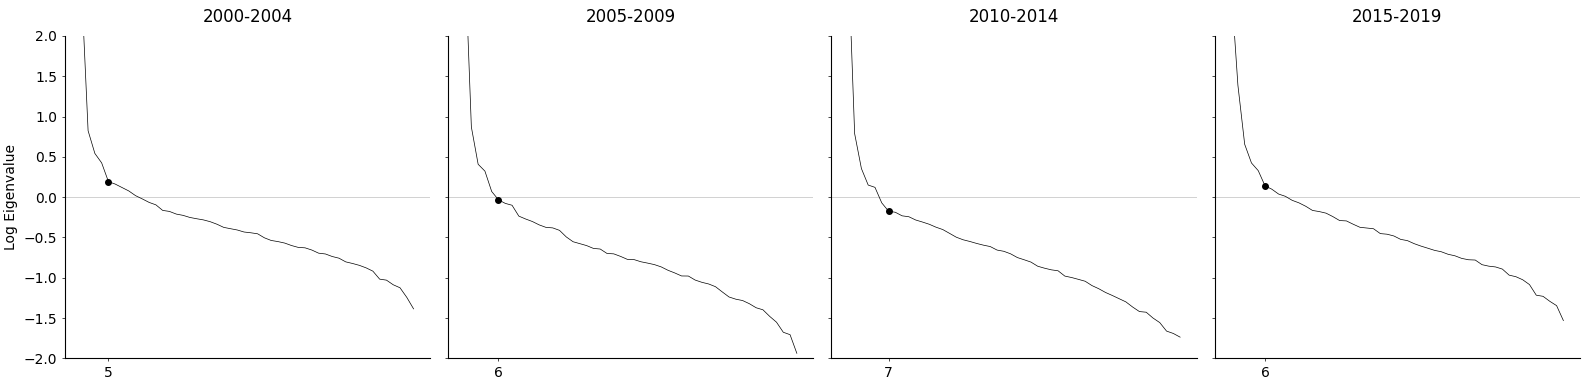

In [10]:
log_scree(corrs_50, cutoffs=[5, 6, 7, 6])

In [11]:
for corr, df in zip(corrs_50, dfs_50): 
    print(aet(corr, df)[0])

5
4
3
5


In [12]:
for corr, df in zip(corrs_50, dfs_50): 
    print(ic_factors(corr, df))

1
2
2
2


In [13]:
for corr in corrs_50: 
    print(kaiser(corr))

9
5
5
9


## 75 Stocks

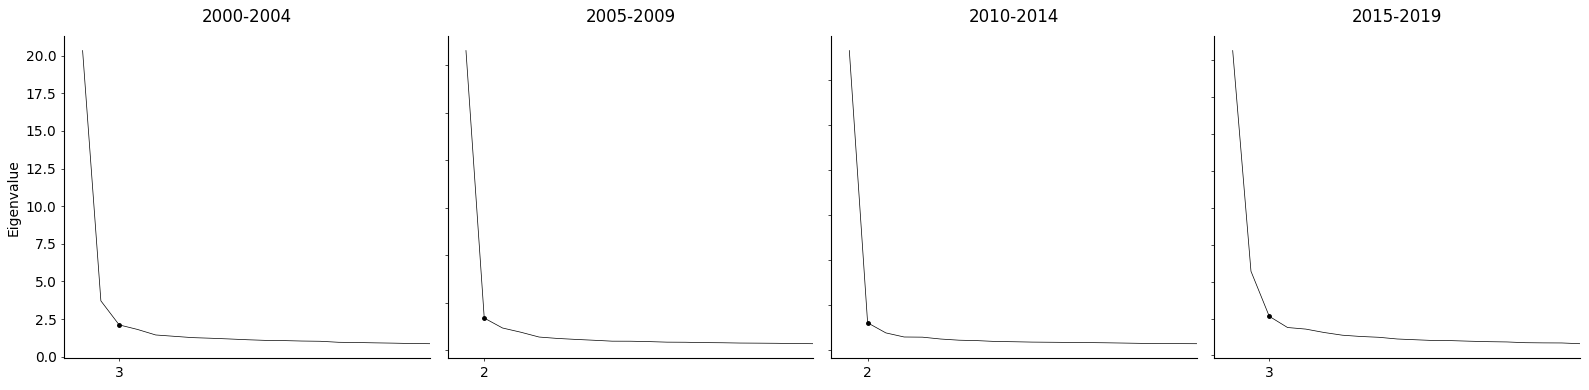

In [14]:
scree(corrs_75, cutoffs=[3, 2, 2, 3], xlim=20)

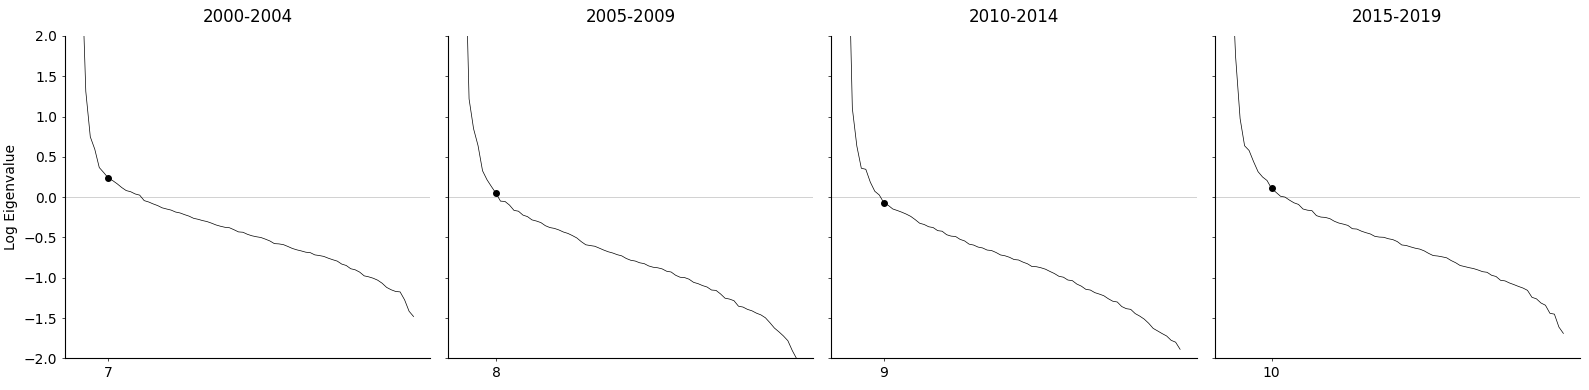

In [15]:
log_scree(corrs_75, cutoffs=[7, 8, 9, 10])

In [16]:
for corr, df in zip(corrs_75, dfs_75): 
    print(aet(corr, df)[0])

7
5
5
8


In [17]:
for corr, df in zip(corrs_75, dfs_75): 
    print(ic_factors(corr, df))

2
3
2
3


In [18]:
for corr in corrs_75: 
    print(kaiser(corr))

14


8
8
13


## 100 Stocks

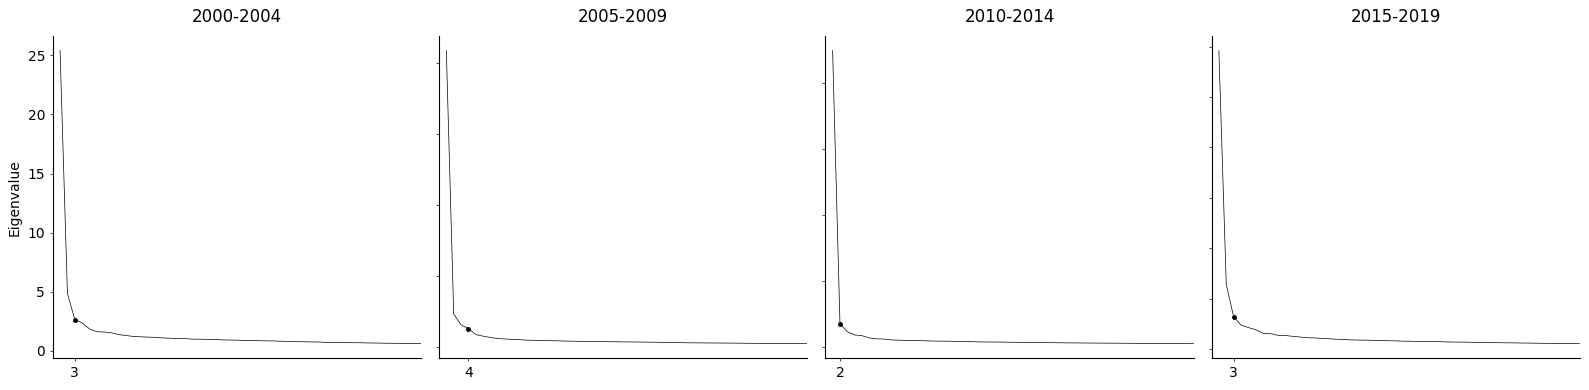

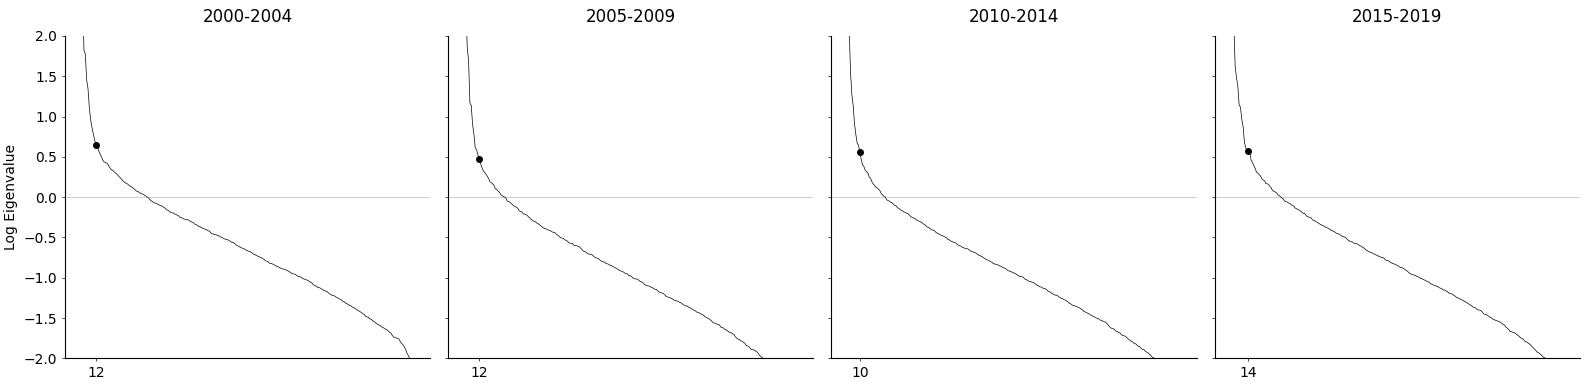

In [19]:
scree(corrs_100, cutoffs=[3, 4, 2, 3], xlim=50)
log_scree(corrs_250, cutoffs=[12, 12, 10, 14])

## 250 Stocks

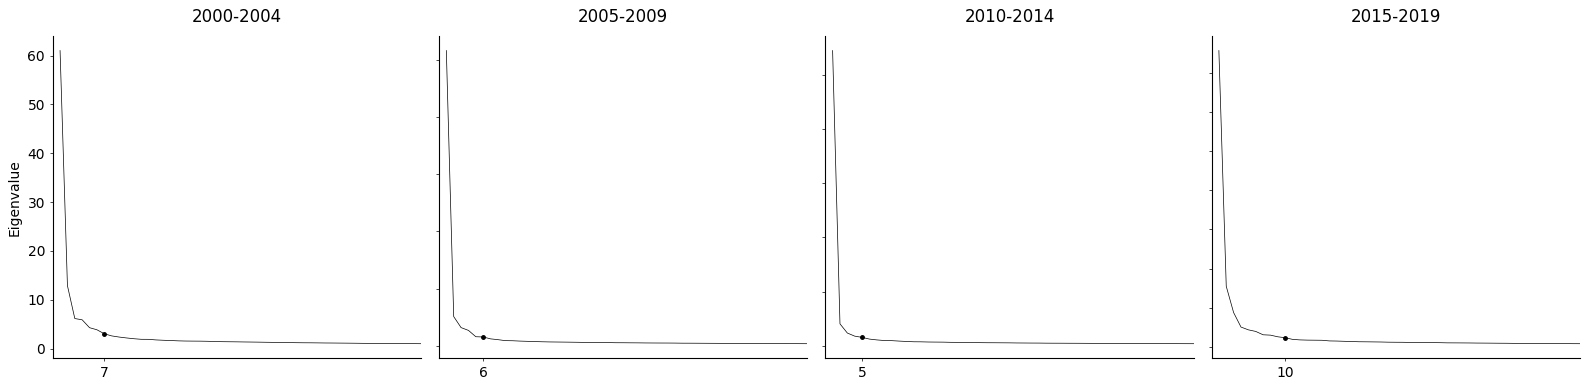

In [20]:
scree(corrs_250, cutoffs=[7, 6, 5, 10], xlim=50)

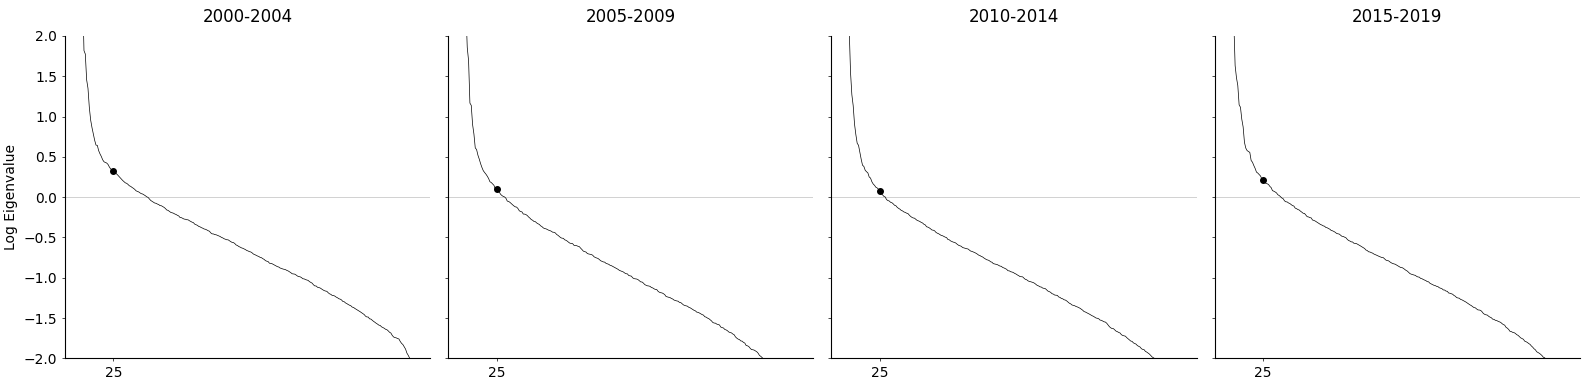

In [21]:
log_scree(corrs_250, cutoffs=[25, 25, 25, 25])

In [22]:
for corr, df in zip(corrs_250, dfs_250): 
    print(aet(corr, df)[0])

22
13
13
18


In [23]:
for corr, df in zip(corrs_250, dfs_250): 
    print(ic_factors(corr, df))

7
7
6
9


In [24]:
for corr in corrs_250: 
    print(kaiser(corr))

50
31
29
38
